# Project Name - Online Retail Customer Segmentation

## Project Type- Unsupervised

### Problem Statement -
The objective of this project is to develop a customer segmentation model for an online retail business in order to gain valuable insights into the customer base and implement targeted strategies to enhance customer satisfaction, increase sales, and optimize marketing efforts. By analyzing transactional data and customer attributes such as purchasing behavior, demographics, and geographic location, the project aims to create meaningful customer segments that can drive personalized marketing campaigns, improve inventory management, and foster customer loyalty.

In [1]:
# importing libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

## Load the data

In [2]:
# dataset loading
df=pd.read_excel(r"C:/Users/Jyotika Phalswal/Downloads/Dataset_Identify customer segments for online retail with the use of K-means clustering\Online Retail.xlsx", sheet_name="Online Retail")

In [3]:
# dataset first view
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


## Understand the Data

In [4]:
# Display the first 5 rows of the dataset
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
# Statistical summary of the dataset
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [7]:
#checking for missing values
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

## Clean the data

In [8]:
# Handle missing values by dropping rows with missing values
df_cleaned = df.dropna()

In [9]:
# Remove duplicate entries
df_cleaned = df_cleaned.drop_duplicates()

In [10]:
# Check for data types and correct if necessary
df_cleaned.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [11]:
# Convert 'InvoiceDate' to datetime if it's not already
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])

In [12]:
# Display the cleaned dataframe's info
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.6+ MB


## Transform the data

In [13]:
# Select numerical columns for standardization
numerical_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()

In [14]:
# Apply standardization
df_cleaned[numerical_cols] = scaler.fit_transform(df_cleaned[numerical_cols])

In [15]:
# Identify categorical columns
categorical_columns = df_cleaned.select_dtypes(include=['object']).columns

In [16]:
# Convert all categorical columns to strings
for col in categorical_columns:
    df_cleaned[col] = df_cleaned[col].astype(str)

In [17]:
# Encode categorical variables
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])
    label_encoders[col] = le

In [18]:
# Check column names to verify the presence of 'InvoiceDate'
print(df_cleaned.columns)

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


In [19]:
# Convert 'InvoiceDate' to numerical features
df_cleaned['InvoiceYear'] = df_cleaned['InvoiceDate'].dt.year
df_cleaned['InvoiceMonth'] = df_cleaned['InvoiceDate'].dt.month
df_cleaned['InvoiceDay'] = df_cleaned['InvoiceDate'].dt.day
df_cleaned['InvoiceHour'] = df_cleaned['InvoiceDate'].dt.hour
df_cleaned['InvoiceMinute'] = df_cleaned['InvoiceDate'].dt.minute

In [20]:
# Drop the original 'InvoiceDate' column
df_cleaned = df_cleaned.drop(['InvoiceDate'], axis=1)

In [21]:
# Ensure all data is numeric
df_cleaned.dtypes

InvoiceNo          int32
StockCode          int32
Description        int32
Quantity         float64
UnitPrice        float64
CustomerID       float64
Country            int32
InvoiceYear        int32
InvoiceMonth       int32
InvoiceDay         int32
InvoiceHour        int32
InvoiceMinute      int32
dtype: object

In [22]:
# Display the transformed dataframe
df_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceHour,InvoiceMinute
0,0,3249,3716,-0.024705,-0.013246,1.498736,35,2010,12,1,8,26
1,0,2649,3724,-0.024705,-0.001205,1.498736,35,2010,12,1,8,26
2,0,2855,861,-0.016714,-0.010379,1.498736,35,2010,12,1,8,26
3,0,2803,1813,-0.024705,-0.001205,1.498736,35,2010,12,1,8,26
4,0,2802,2776,-0.024705,-0.001205,1.498736,35,2010,12,1,8,26


## Feature Engineering

In [23]:
# Create a new feature: TotalPrice
df_cleaned['TotalPrice'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']

In [24]:
# Perform feature selection
# Assume we are predicting 'TotalPrice' and use other columns as features
X = df_cleaned.drop(['TotalPrice'], axis=1)
y = df_cleaned['TotalPrice']

In [25]:
# Select the top 5 features
selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X, y)

C:\Users\Jyotika Phalswal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


In [26]:
# Get the selected feature names
selected_features = X.columns[selector.get_support()]

In [27]:
# Display selected features
selected_features

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'UnitPrice'], dtype='object')

## Standardize the Data

In [28]:
# Select the features to be standardized
features = ['Quantity', 'UnitPrice']

In [29]:
# Standardize the features
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

In [30]:
# Display the standardized features
print(df[features].head())

   Quantity  UnitPrice
0 -0.016289  -0.021301
1 -0.016289  -0.012620
2 -0.007118  -0.019234
3 -0.016289  -0.012620
4 -0.016289  -0.012620


## Determine the Optimal Number of Clusters using the Elbow Method

In [31]:
# Calculate WCSS for different number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df[features])
    wcss.append(kmeans.inertia_)

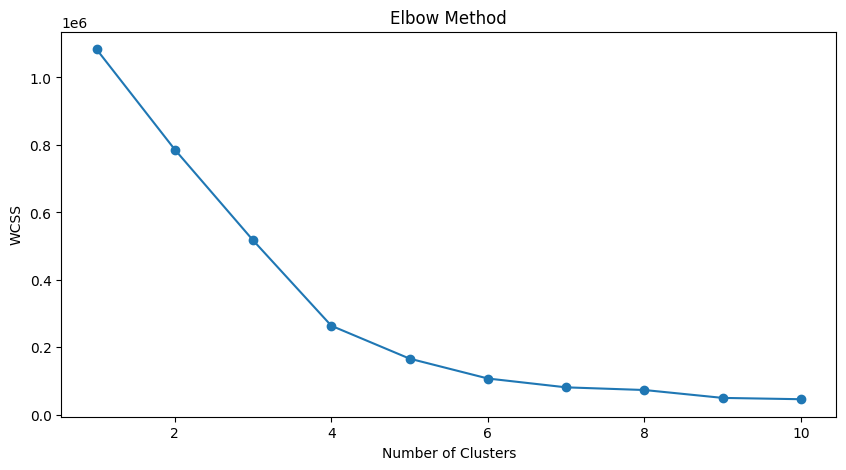

In [32]:
# Plot the WCSS against the number of clusters
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

#### The determination of the optimal number of clusters using the elbow method involves identifying the point where the within-cluster sum of squares (WCSS) starts to decrease more slowly.In your case, the decrease from 𝑘=3 to k=4 is less steep compared to the decrease from k=2 to k=4 , suggesting that k=3 might be the optimal choice. 

## Run K-Means Clustering

In [33]:
# Run K-Means clustering with the optimal number of clusters
optimal_clusters = 3  
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[features])

In [34]:
print(df['Cluster'].value_counts())

Cluster
0    541876
1        31
2         2
Name: count, dtype: int64


In [35]:
# Display the first few rows with cluster labels
print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER -0.016289   
1    536365     71053                  WHITE METAL LANTERN -0.016289   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER -0.007118   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE -0.016289   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART. -0.016289   

          InvoiceDate  UnitPrice  CustomerID         Country  Cluster  
0 2010-12-01 08:26:00  -0.021301     17850.0  United Kingdom        0  
1 2010-12-01 08:26:00  -0.012620     17850.0  United Kingdom        0  
2 2010-12-01 08:26:00  -0.019234     17850.0  United Kingdom        0  
3 2010-12-01 08:26:00  -0.012620     17850.0  United Kingdom        0  
4 2010-12-01 08:26:00  -0.012620     17850.0  United Kingdom        0  


## Visualize the clusters

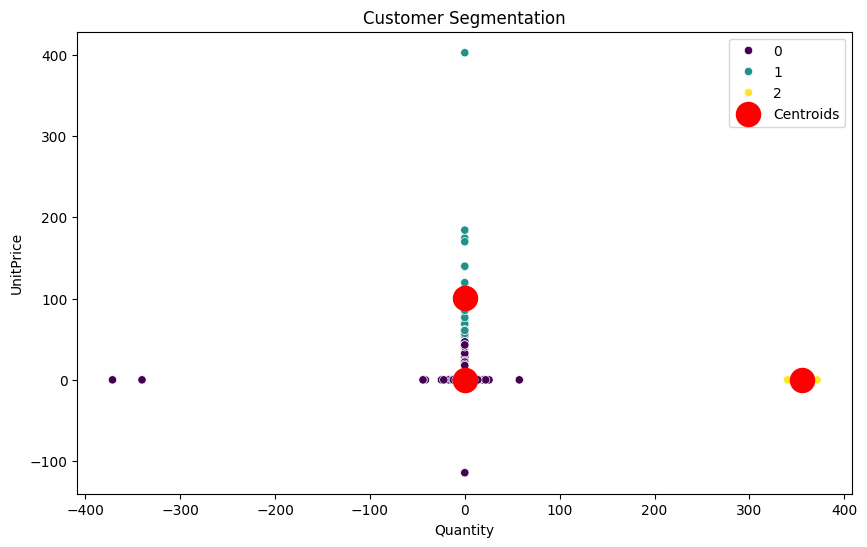

In [36]:
# Visualize the clusters using scatter plots
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Quantity', y='UnitPrice', hue='Cluster', data=df, palette='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('Customer Segmentation')
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.legend()
plt.show()

## Assign Cluster Labels to the Original Data


In [37]:
original_data = pd.read_excel(r"C:/Users/Jyotika Phalswal/Downloads/Dataset_Identify customer segments for online retail with the use of K-means clustering\Online Retail.xlsx", sheet_name="Online Retail")
original_data['Cluster'] = df['Cluster']

In [38]:
# Display the first 5 rows of the dataset with cluster label
original_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cluster
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0


## Analyze Each Segment

In [39]:
cluster_summary = original_data.groupby('Cluster').agg({
    'Quantity': ['mean', 'median', 'std'],
    'UnitPrice': ['mean', 'median', 'std']
}).reset_index()

In [40]:
print(cluster_summary)

  Cluster      Quantity                          UnitPrice           \
                   mean   median          std         mean   median   
0       0      9.266447      3.0   159.049517     4.054723     2.08   
1       1     -0.806452     -1.0     0.601074  9730.436452  6930.00   
2       2  77605.000000  77605.0  4794.183976     1.560000     1.56   

                
           std  
0    38.715649  
1  6655.498688  
2     0.735391  


In [41]:
df_summary = pd.DataFrame(cluster_summary)

In [45]:
# Flatten the multi-level columns
df_summary.columns = ['Cluster', 'Mean Quantity', 'Median Quantity', 'Quantity StdDev', 
                      'Mean UnitPrice', 'Median UnitPrice', 'UnitPrice StdDev']

In [46]:
df_summary

,Cluster,Mean Quantity,Median Quantity,Quantity StdDev,Mean UnitPrice,Median UnitPrice,UnitPrice StdDev
0,0,9.266447,3.0,159.049517,4.054723,2.08,38.715649
1,1,-0.806452,-1.0,0.601074,9730.436452,6930.00,6655.498688
2,2,77605.000000,77605.0,4794.183976,1.560000,1.56,0.735391


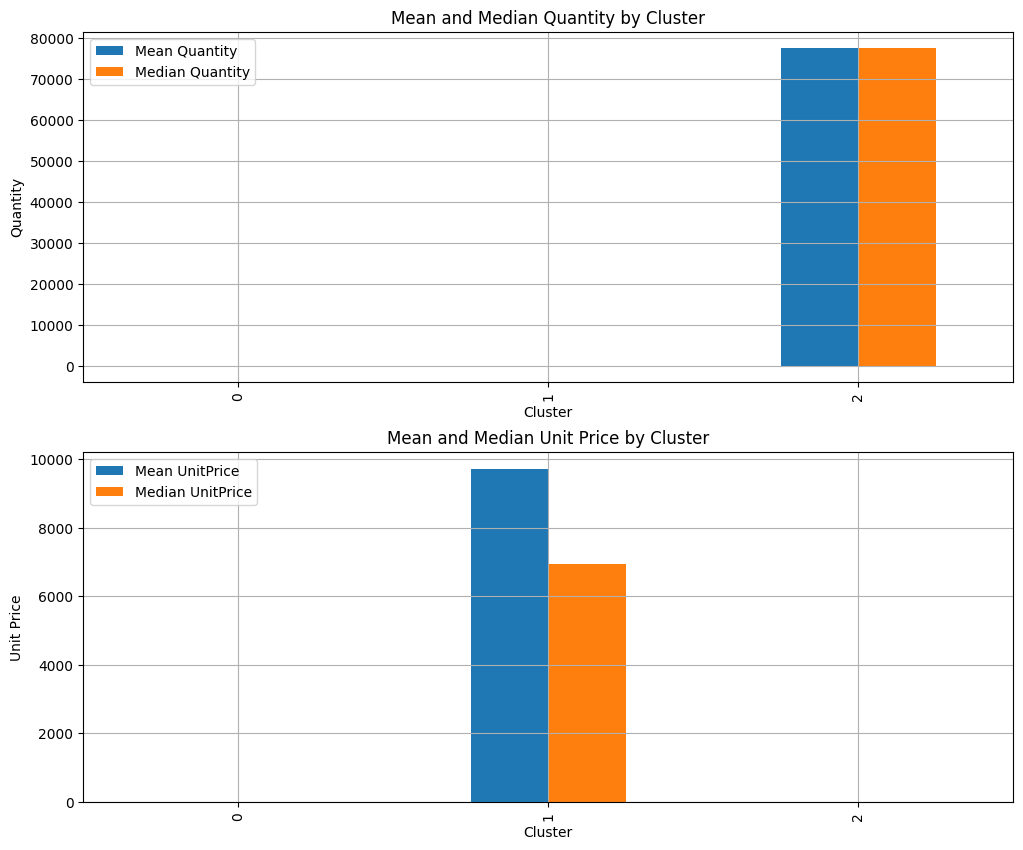

In [48]:
# Plotting Mean Quantity and Mean UnitPrice
fig, ax = plt.subplots(2, 1, figsize=(12, 10))
df_summary.plot(kind='bar', x='Cluster', y=['Mean Quantity', 'Median Quantity'], ax=ax[0])
ax[0].set_title('Mean and Median Quantity by Cluster')
ax[0].set_ylabel('Quantity')
ax[0].legend(loc='upper left')
ax[0].grid(True)

# Plotting Mean and Median Unit Price by Cluster
df_summary.plot(kind='bar', x='Cluster', y=['Mean UnitPrice', 'Median UnitPrice'], ax=ax[1])
ax[1].set_title('Mean and Median Unit Price by Cluster')
ax[1].set_ylabel('Unit Price')
ax[1].legend(loc='upper left')
ax[1].grid(True)

## Profile the Customer Segments

In [49]:
# Profile the Customer Segments
for cluster in original_data['Cluster'].unique():
    cluster_data = original_data[original_data['Cluster'] == cluster]
    print(f"Cluster {cluster} Profile:")
    print(f"Mean Quantity: {cluster_data['Quantity'].mean()}")
    print(f"Mean UnitPrice: {cluster_data['UnitPrice'].mean()}")
    print(f"Number of Customers: {cluster_data['CustomerID'].nunique()}")
    print("-" * 40)

Cluster 0 Profile:
Mean Quantity: 9.266446567111295
Mean UnitPrice: 4.054723449645307
Number of Customers: 4372
----------------------------------------
Cluster 1 Profile:
Mean Quantity: -0.8064516129032258
Mean UnitPrice: 9730.436451612904
Number of Customers: 2
----------------------------------------
Cluster 2 Profile:
Mean Quantity: 77605.0
Mean UnitPrice: 1.56
Number of Customers: 2
----------------------------------------


In [50]:
# Visualization of cluster profiles
plt.figure(figsize=(15, 5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

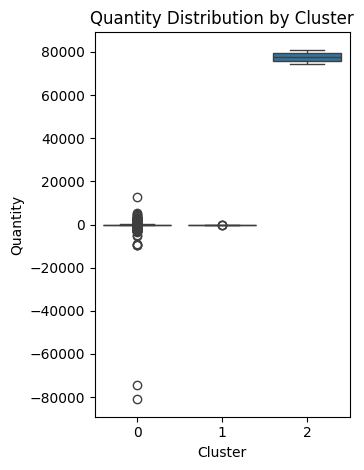

In [51]:
# Quantity box plot
plt.subplot(1, 2, 1)
sns.boxplot(x='Cluster', y='Quantity', data=original_data)
plt.title('Quantity Distribution by Cluster')
plt.tight_layout()
plt.show()

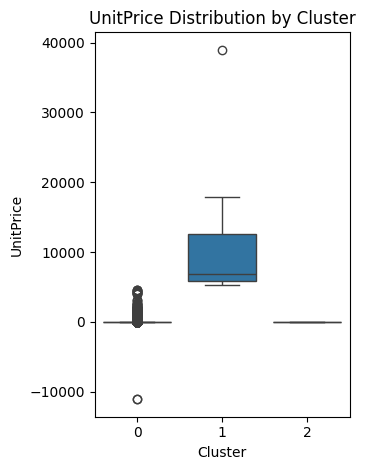

In [55]:
# UnitPrice box plot
plt.subplot(1, 2, 2)
sns.boxplot(x='Cluster', y='UnitPrice', data=original_data)
plt.title('UnitPrice Distribution by Cluster')
plt.tight_layout()
plt.show()